# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alfun Roehatul Jannah
- **Email:** alfunjannah25@gmail.com
- **ID Dicoding:** alfunroeha

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sepeda berbanding dengan suhu dan kelembaban? 
- Bagaimana cuaca memengaruhi penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
data=pd.read_csv("data/day.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Assessing Data

In [3]:
#cek missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
#cek duplicate data
data.duplicated().sum()

0

In [5]:
#cek outliers di data temp, hum, weathersit dan cnt
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers

temp_data = data['temp'].tolist()
outliers = detect_outliers(temp_data)
print("Outliers data suhu:", outliers)

hum_data = data['hum'].tolist()
outliers = detect_outliers(hum_data)
print("Outliers data kelembapan:", outliers)

weathersit_data = data['weathersit'].tolist()
outliers = detect_outliers(weathersit_data)
print("Outliers data cuaca:", outliers)

cnt_data = data['cnt'].tolist()
outliers = detect_outliers(cnt_data)
print("Outliers data jumlah pengguna sepeda:", outliers)

Outliers data suhu: []
Outliers data kelembapan: [0.187917, 0.0]
Outliers data cuaca: []
Outliers data jumlah pengguna sepeda: []


### Cleaning Data

In [6]:
#membersihkan outliers dari data humidity menggunakan teknik imputation
Q1 = (data['hum']).quantile(0.25)
Q3 = (data['hum']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = data['hum'] < minimum
kondisi_more_than = data['hum'] > maximum
 
data.drop(data[kondisi_lower_than].index, inplace=True)
data.drop(data[kondisi_more_than].index, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18088\1154805814.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[kondisi_more_than].index, inplace=True)


Karena hanya data 'hum' yang memiliki outliers maka data ini yang dibersihkan. Salah satu teknik untuk membersihkan outliers dengan metode drop, metode ini mampu mencegah outlier memengaruhi hasil analisis yang kita buat. Metode ini bekerja dengan menghapus data outlier.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     729 non-null    int64  
 1   dteday      729 non-null    object 
 2   season      729 non-null    int64  
 3   yr          729 non-null    int64  
 4   mnth        729 non-null    int64  
 5   holiday     729 non-null    int64  
 6   weekday     729 non-null    int64  
 7   workingday  729 non-null    int64  
 8   weathersit  729 non-null    int64  
 9   temp        729 non-null    float64
 10  atemp       729 non-null    float64
 11  hum         729 non-null    float64
 12  windspeed   729 non-null    float64
 13  casual      729 non-null    int64  
 14  registered  729 non-null    int64  
 15  cnt         729 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 96.8+ KB


## Exploratory Data Analysis (EDA)

### Explore data day.csv

In [8]:
#rangkuman parameter statistik dari data day.csv 
data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,729.000000,729,729.000000,729.000000,729.000000,729.000000,729.00000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
unique,NaN,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.840878,NaN,2.500686,0.502058,6.530864,0.028807,2.99177,0.684499,1.393690,0.495663,0.474589,0.629359,0.189953,849.710562,3663.898491,4513.609053
std,210.842272,NaN,1.109555,0.500339,3.450107,0.167377,2.00410,0.465034,0.542191,0.183225,0.163123,0.139758,0.076662,686.820245,1555.329576,1931.582099
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.00000,0.000000,1.000000,0.336667,0.337746,0.522083,0.134950,316.000000,2506.000000,3190.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.00000,1.000000,1.000000,0.500000,0.487996,0.627500,0.180967,721.000000,3667.000000,4549.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.00000,1.000000,2.000000,0.655833,0.609229,0.730417,0.233204,1097.000000,4790.000000,5976.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [9]:
#mencari hubungan penggunaan sepeda dengan suhu dan kelembapan
correlation = data[['temp', 'hum', 'cnt']].corr().loc['cnt', 'temp']
correlation_humidity = data[['temp', 'hum', 'cnt']].corr().loc['cnt', 'hum']

print("Korelasi antara suhu dan jumlah pengguna sepeda:", correlation)
print("Korelasi antara kelembapan dan jumlah pengguna sepeda:", correlation_humidity)

Korelasi antara suhu dan jumlah pengguna sepeda: 0.6277722350926187
Korelasi antara kelembapan dan jumlah pengguna sepeda: -0.12203925129240215


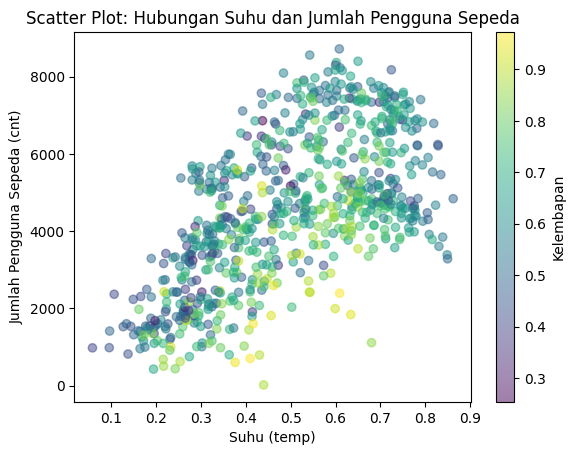

In [10]:
# Membuat scatter plot dengan warna marker yang ditentukan oleh kelembapan
plt.scatter(data['temp'], data['cnt'], c=data['hum'], cmap='viridis', alpha=0.5)

# Menambahkan bar warna untuk menunjukkan skala kelembapan
plt.colorbar(label='Kelembapan')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot: Hubungan Suhu dan Jumlah Pengguna Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt)')

# Menampilkan plot
plt.show()

### Pertanyaan 2:

In [11]:
#mencari korelasi cuaca dengan jumlah pengguna sepeda
correlation = data['weathersit'].corr(data['cnt'])

print("Korelasi cuaca dan jumlah pengguna sepeda", correlation)

Korelasi cuaca dan jumlah pengguna sepeda -0.2938727413205395


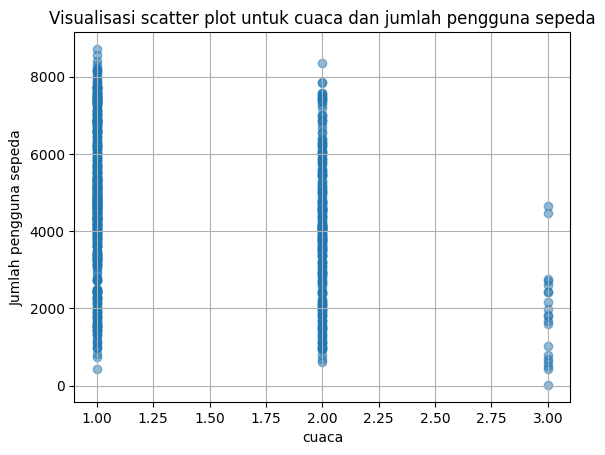

In [12]:
#membuat scatter plot untuk melihat hubungan cuaca dengan jumlah pengguna sepeda
plt.scatter(data['weathersit'], data['cnt'], alpha=0.5)
plt.title('Visualisasi scatter plot untuk cuaca dan jumlah pengguna sepeda')
plt.xlabel('cuaca')
plt.ylabel('Jumlah pengguna sepeda')
plt.grid(True)
plt.show()

## Conclusion

- Kesimpulan dari pertanyaan 1: Terdapat hubungan antara suhu dengan jumlah pengguna sepeda, hal ini dapat dilihat dari hasil kolerasi suhu dengan jumlah pengguna sepeda yang hasilnya adalah 0.6277722350926187. Dari hasil tersebut menunjukkan bahwa kolerasi bersesuaian karena hasilnya positif. Sementara tidak terdapat hubungan antara kelembapan dengan jumlah pengguna sepeda karena hasil kolerasinya adalah -0.12203925129240215, yang mana hasilnya negatif dan mendekati nol yang menunjukkan bahwa hubungannya negatif yang sangat lemah antara kelembapan dan jumlah pengguna sepeda sehingga mungkin tidak memiliki relevansi yang signifikan dalam memprediksi jumlah pengguna sepeda berdasarkan kelembapan saja. Dari hasil scatter plot, jumlah pengguna sepeda meningkat sering dengan kenaikan suhu yang paling banyak di sekitar 0.6, sementara untuk kelembapan terlihat menyebar dan memiliki pola yang menunjukkan bahwa jumlah pengguna sepeda meningkat ketika kelembapan rendah dan begitu juga sebaliknya.
- Kesimpulan pertanyaan 2:  Terdapat kemungkinan bahwa cuaca memiliki hubungan dengan jumlah pengguna sepeda. Nilai korelasi yang dihasilkan yaitu -0.2938727413205395, yang mana menunjukkan bahwa ada hubungan negatif yang sedang hingga sedang kuat antara cuaca dan jumlah pengguna sepeda. Dalam hal ini, semakin rendah nilai cuaca maka semakin banyak jumlah pengguna sepeda. Namun, nilai korelasi tersebut menunjukkan bahwa hubungan tersebut tidak sangat kuat, sehingga faktor-faktor lain juga dapat berpengaruh. Dari hasil scatter plot, pengguna sepeda meningkat jumlahnya di cuaca 1 dan cuaca 2 dibandingkan dengan cuaca 3. Menurut informasi yang disediakan di Kaggle dalam desripsi data ini di bagian weathersit bahwa  
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
     sehingga dapat disimpulkan bahwa pengguna sepeda lebih memilih bersepeda di cuaca yang cerah atau mendung dibandingkan di cuaca bersalju atau hujan.

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6034605264009948


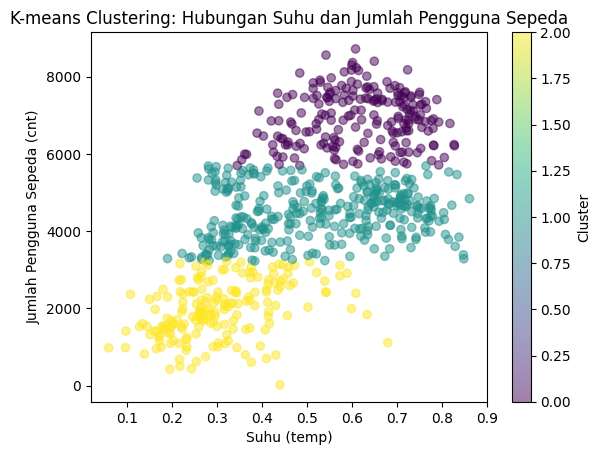

In [14]:
#analisis lanjutan menggunakan clustering K-Means
from sklearn.cluster import KMeans

# Pilih fitur yang akan digunakan untuk clustering
X = data[['temp', 'hum', 'weathersit', 'cnt']]

# Lakukan preprocessing data jika diperlukan

# Tentukan jumlah cluster yang diinginkan
n_clusters = 3

# Terapkan algoritma K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Dapatkan label cluster untuk setiap sampel data
labels = kmeans.labels_

# Evaluasi hasil clustering, misalnya dengan menggunakan silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

# Interpretasi hasil clustering

# Visualisasi hasil clustering
plt.scatter(X['temp'], X['cnt'], c=labels, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering: Hubungan Suhu dan Jumlah Pengguna Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt)')
plt.colorbar(label='Cluster')
plt.show()


Silhouette score yang dihasilkan yaitu 0.6034605264009948 yang berarti bahwa clustering K-Means memiliki kohesi yang baik di dalam cluster dan pemisahan yang baik antar cluster. Dari pengelompokan tersebut, dapat disimpulkan bahwa terdapat 3 cluster yang berwarna kuning, hijau dan ungu. Cluster tersebut mengelompokkan pengguna sepeda berdasarkan jumlahnya. 